In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import string
import math
import gensim.downloader as api

In [22]:
import sklearn

print(sklearn.__version__)

1.2.1


Get the DF

In [23]:
df = pd.read_excel("Dataset.xlsx")
questionList = df["Question"].unique()
answerList = df["Answer"]
# for answer in answerList:
#     print(answer)
print("Answer list : {}".format(len(answerList)))
print("Question list : {}".format(len(questionList)))


Answer list : 72
Question list : 11


Get word set (for experimenting and for TF-IDF later)

In [29]:
# get all words
import contractions
word_list = ""
for i in range(len(df)):
    word_list += " {}".format(df["Answer"][i])

word_list = word_list.lower()

word_list = contractions.fix(word_list)
    
# Remove punctuations
corpus = "".join([char for char in word_list if char not in string.punctuation])

word_set = set()
for word in nltk.word_tokenize(corpus):
    word_set.add(corpus)

Cleaning and preprocessing

In [30]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import inflect

# this function returns a list of tokens, cleaned and preprocessed. 
def preprocess_document(corpus, isLemma=False, isStopwords=False, isInflect=False, isNumberFiltered=True):   
   
   inflector = inflect.engine() # prepare inflector
   stop_words = set(stopwords.words("english"))
   lemmatizer = WordNetLemmatizer()
   punctuations = string.punctuation

   # if numbers are filtered, add that to the punctuation string
   if isNumberFiltered:
      punctuations += "1234567890"

   # case fold
   corpus = corpus.lower()

   # remove puncs
   corpus = "".join([char for char in corpus if char not in punctuations])

   # tokenize it.
   token_list = nltk.word_tokenize(corpus)

   for i in range(len(token_list)):
      # if inflect
      if isInflect:
         if token_list[i].isdigit():
            token_list[i] = inflector.number_to_words(token_list[i])

      # if lemma
      if isLemma:
         tagged_word = nltk.pos_tag([token_list[i]])
         wordnet_pos = get_wordnet_pos(tagged_word[0][1])
         token_list[i] = lemmatizer.lemmatize(tagged_word[0][0], pos=wordnet_pos)
      
      # if stopword
      if isStopwords:
         if token_list[i] in stop_words or token_list[i].isdigit():
            token_list[i] = "#" # mark as #
      
   # remove the marked strings
   token_list = [token for token in token_list if token != "#"]
   return token_list
            
def get_wordnet_pos(tag):
    """Map POS tag to WordNet POS tag"""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # solves as noun by default.



In [31]:
word_tokens = preprocess_document(word_list, isLemma=True)
word_set = set(word_tokens)
print(len(word_set))
for word in word_set:
    print(word)


504
seem
grace
part
first
form
pregnancy
most
term
also
heaven
to
kbbi
conflict
by
justice
texas
die
time
then
christian
theory
hell
regenerate
science
harder
indo
woman
creature
view
defect
people
yes
law
go
trick
fight
yet
outlet
act
difficulty
evil
ready
temperature
base
everybody
so
hard
depends
retract
legal
thing
point
think
have
event
least
out
possess
value
community
after
defies
bad
destroyed
personally
fish
sense
understands
nary
limitation
everbody
be
holiness
that
path
narcissist
logically
opinion
belief
process
purpose
minimize
assault
call
decide
disagree
build
forgiveable
your
balance
a
consider
consequence
we
itself
period
still
unicellular
lead
imperfection
wrong
orphanage
happens
size
religious
certain
need
pity
set
u
outside
about
ask
some
right
over
good
fetus
amphibious
mistake
give
fun
present
them
though
standard
for
marries
choice
eye
general
future
me
difficult
mammal
consciousness
cost
receives
should
big
where
eternal
refer
both
when
chance
mortal
etc
holy
bo

TF-IDF implementation

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = [
    "what the hell, oh my god, no way",
    "what the hell, aw man brother that ain't no jordan man",
    "he was born next to a nuclear power plant, has an IQ of 2",
    "and got hit in the head with several rocks as a child but boy can he play basketball!"
    "man man man man man man man man man man man"
]
documents = [preprocess_document(doc, isLemma=True, isStopwords=True) for doc in documents]
flattened_documents = [' '.join(doc) for doc in documents]
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(flattened_documents)

tfidf_keys  = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(matrix.toarray(), columns=tfidf_keys)

df

,No,Question,Answer,Event,Speaker,Q-Label,A-Label
0,1,How did we come to exist?,Everybody should believe that they are creatio...,2022-02-19,P,Sesuai,Sesuai
1,2,How did we come to exist?,"We came from evolution. This is undeniable, an...",2022-02-19,G,Sesuai,Sesuai
2,3,Do you think you need to exist?,We don't really need to exist. Even if I don't...,2022-02-19,P,Sesuai,Sesuai
3,4,Do you think you need to exist?,"I don't think we need to exist. As Peter said,...",2022-02-19,Je,Sesuai,Sesuai
4,5,Do you think you need to exist?,I think we are a part of a bigger picture.,2022-02-19,Th,Sesuai,Tidak Sesuai
...,...,...,...,...,...,...,...
67,68,We see from our side that maybe they are miser...,"Everyone has rights, even fetuses or babies, b...",2023-07-02,Stanley,NaN,NaN
68,69,We see from our side that maybe they are miser...,Is it wrong to regret life? That is the right ...,2023-07-02,Greg,NaN,NaN
69,70,We see from our side that maybe they are miser...,"Actually, we humans are well aware that life i...",2023-07-02,Yotam,NaN,NaN
70,71,We see from our side that maybe they are miser...,The law didn't need to be revised. Choosing th...,2023-07-02,Stanley,NaN,NaN


Draw this shit out

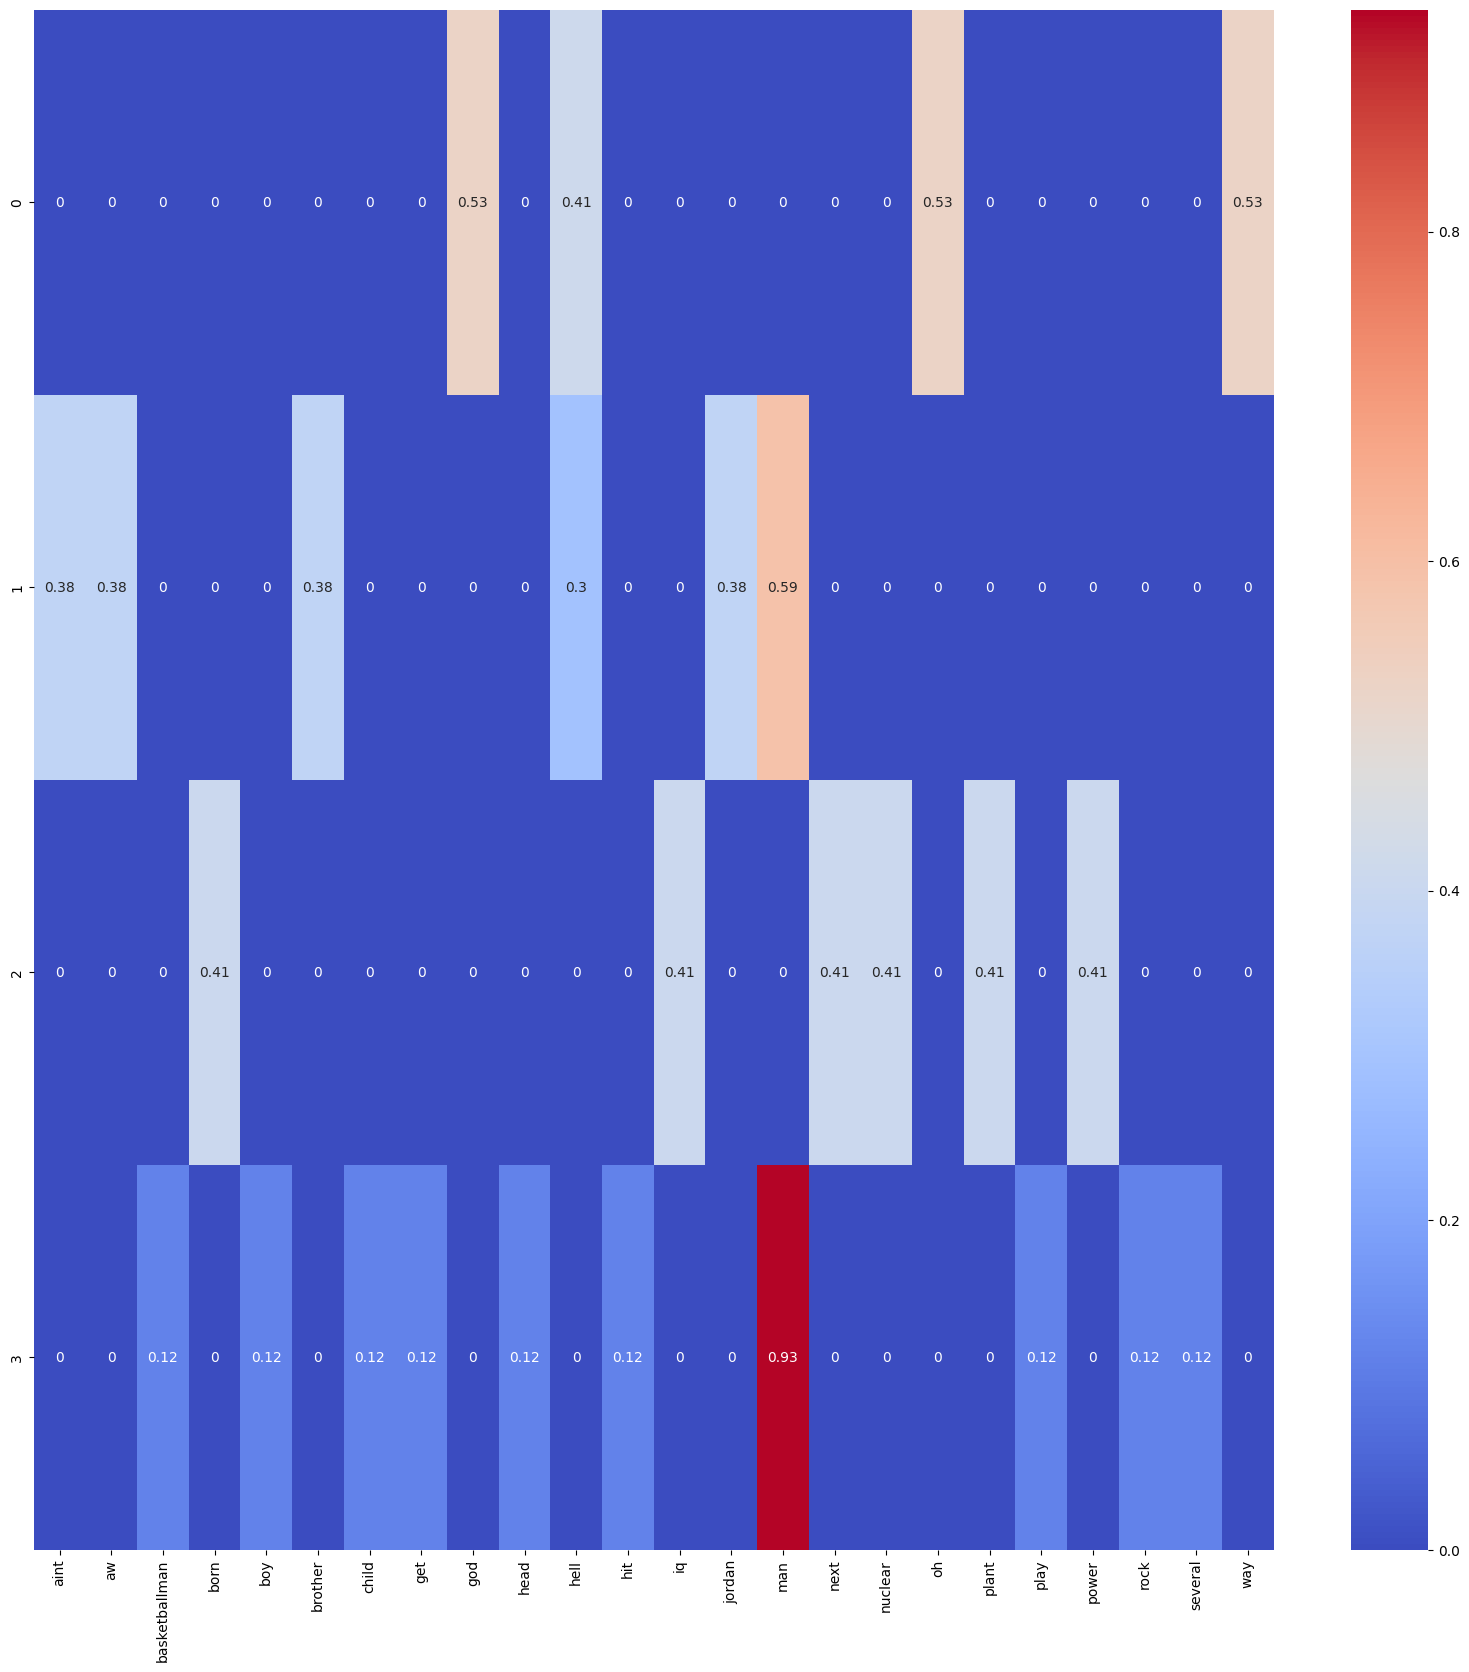

In [9]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df_tfidf, annot=True, cmap='coolwarm')
plt.show()

Trying out lemmatizer

In [33]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
text = word_list
egToken = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(egToken)
print(pos_tags)

[('everybody', 'NN'), ('should', 'MD'), ('believe', 'VB'), ('that', 'IN'), ('they', 'PRP'), ('are', 'VBP'), ('creations', 'NNS'), (',', ','), ('made', 'VBN'), ('by', 'IN'), ('a', 'DT'), ('creator', 'NN'), ('.', '.'), ('it', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('prerequisite', 'NN'), ('to', 'TO'), ('believing', 'VBG'), ('anything', 'NN'), ('else', 'RB'), ('that', 'IN'), ('comes', 'VBZ'), ('after', 'IN'), ('.', '.'), ('we', 'PRP'), ('came', 'VBD'), ('from', 'IN'), ('evolution', 'NN'), ('.', '.'), ('this', 'DT'), ('is', 'VBZ'), ('undeniable', 'JJ'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('charles', 'NNS'), ('darwin', 'VBP'), ("'s", 'POS'), ('evolution', 'NN'), ('model', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('most', 'RBS'), ('widely', 'RB'), ('accepted', 'VBD'), ('theory', 'NN'), ('to', 'TO'), ('this', 'DT'), ('.', '.'), ('we', 'PRP'), ('evolved', 'VBD'), ('from', 'IN'), ('unicellular', 'JJ'), ('bacteriae', 'NN'), (',', ','), ('to', 'TO'), ('fish', 'VB'), (',', ','), ('to', 'TO'), ('am

In [34]:
import contractions
text = """
What the fuck did you just fucking say about me, you little bitch? I'll have you know I graduated top of my class in the Navy Seals, and I've been involved in numerous secret raids on Al-Quaeda, and I have over 300 confirmed kills.

I am trained in gorilla warfare and I'm the top sniper in the entire US armed forces. You are nothing to me but just another target. I will wipe you the fuck out with precision the likes of which has never been seen before on this Earth, mark my fucking words.

You think you can get away with saying that shit to me over the Internet? Think again, fucker. As we speak I am contacting my secret network of spies across the USA and your IP is being traced right now so you better prepare for the storm, maggot. The storm that wipes out the pathetic little thing you call your life. You're fucking dead, kid. I can be anywhere, anytime, and I can kill you in over seven hundred ways, and that's just with my bare hands.

Not only am I extensively trained in unarmed combat, but I have access to the entire arsenal of the United States Marine Corps and I will use it to its full extent to wipe your miserable ass off the face of the continent, you little shit. If only you could have known what unholy retribution your little “clever” comment was about to bring down upon you, maybe you would have held your fucking tongue.

But you couldn't, you didn't, and now you're paying the price, you goddamn idiot. I will shit fury all over you and you will drown in it.

You're fucking dead, kiddo.
"""

def get_wordnet_pos(tag):
    """Map POS tag to WordNet POS tag"""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # solves as noun by default.

text = text.lower()
text = contractions.fix(text)
text = "".join([char for char in text if char not in string.punctuation])

navySeal = nltk.word_tokenize(text)
navySeal_pos_tags = nltk.pos_tag(navySeal)
navySeal_pos_tags
lemmatizer = WordNetLemmatizer()

lemmas = []
for token, pos in navySeal_pos_tags:
    # Map POS tag to WordNet POS tag
    wordnet_pos = get_wordnet_pos(pos)
    # print(token, " | ", pos)
    # print(wordnet_pos)
    # # Lemmatize token
    lemma = lemmatizer.lemmatize(token, pos=wordnet_pos)
    lemmas.append(lemma)

lemmatized_text = " ".join(lemmas)

print(lemmatized_text)
print(navy)

what the fuck do you just fuck say about me you little bitch i will have you know i graduate top of my class in the navy seal and i have be involve in numerous secret raid on alquaeda and i have over 300 confirmed kill i be train in gorilla warfare and i be the top sniper in the entire u arm force you be nothing to me but just another target i will wipe you the fuck out with precision the like of which have never be see before on this earth mark my fucking word you think you can get away with say that shit to me over the internet think again fucker a we speak i be contact my secret network of spy across the usa and your ip be be trace right now so you good prepare for the storm maggot the storm that wipe out the pathetic little thing you call your life you be fuck dead kid i can be anywhere anytime and i can kill you in over seven hundred way and that be just with my bare hand not only be i extensively train in unarmed combat but i have access to the entire arsenal of the united state 

NameError: name 'navy' is not defined

Trying out inflection

In [35]:
import inflect
numberMix = [
    "12",
    "21",
    "twenty one",
    "177103",
    "you stupid"
]
p = inflect.engine()
twenty_one = p.number_to_words(numberMix[1])
print(twenty_one)

twenty-one


Visualizing the TF-IDF, if it is even possible.

I figure it's an X (words) by Y (document) matrix, so it's possible, if cumbersome.

<AxesSubplot: >

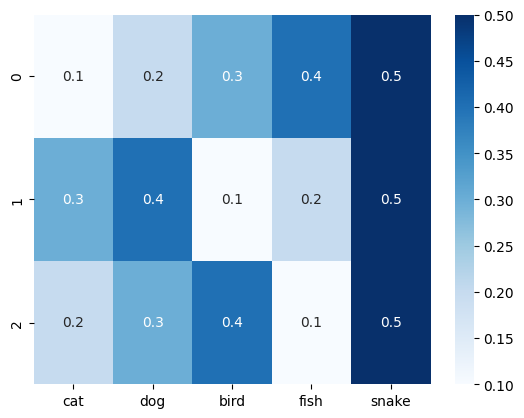

In [18]:
import seaborn as sns
import pandas as pd

# Example TF-IDF vectors
tfidf_vectors = [[0.1, 0.2, 0.3, 0.4, 0.5],
                 [0.3, 0.4, 0.1, 0.2, 0.5],
                 [0.2, 0.3, 0.4, 0.1, 0.5]]

# Example vocabulary
vocabulary = ['cat', 'dog', 'bird', 'fish', 'snake']

# Create DataFrame from TF-IDF vectors and vocabulary
dfo = pd.DataFrame(tfidf_vectors, columns=vocabulary)

# Create heatmap
sns.heatmap(dfo, cmap='Blues', annot=True)

For this one we weight-average an entire document.

In [19]:
cleaned_docs = []
word_embedded_docs = []
for answer in df["Answer"]:
    tokens = preprocess_document(answer, isLemma=True, isStopwords=True, isInflect=True)
    word_embedded_docs.append(word_embed(tokens, model))
    cleaned_docs.append(' '.join(tokens))

df["Cleaned Docs"] = cleaned_docs

NameError: name 'word_embed' is not defined

In [15]:
df["Cleaned Docs"][5]

KeyError: 'Cleaned Docs'

In [50]:
# aggregate the document with weight-average


,No,Question,Answer,Event,Speaker,Q-Label,A-Label,Cleaned Docs
0,1,How did we come to exist?,Everybody should believe that they are creatio...,2022-02-19,P,Sesuai,Sesuai,everybody believe creation make creator prereq...
1,2,How did we come to exist?,"We came from evolution. This is undeniable, an...",2022-02-19,G,Sesuai,Sesuai,come evolution undeniable charles darwin evolu...
2,3,Do you think you need to exist?,We don't really need to exist. Even if I don't...,2022-02-19,P,Sesuai,Sesuai,dont really need exist even dont exist everyth...
3,4,Do you think you need to exist?,"I don't think we need to exist. As Peter said,...",2022-02-19,Je,Sesuai,Sesuai,dont think need exist peter say everything wou...
4,5,Do you think you need to exist?,I think we are a part of a bigger picture.,2022-02-19,Th,Sesuai,Tidak Sesuai,think part big picture
...,...,...,...,...,...,...,...,...
67,68,We see from our side that maybe they are miser...,"Everyone has rights, even fetuses or babies, b...",2023-07-02,Stanley,NaN,NaN,everyone right even fetus baby realistic worry...
68,69,We see from our side that maybe they are miser...,Is it wrong to regret life? That is the right ...,2023-07-02,Greg,NaN,NaN,wrong regret life right individual fetus speci...
69,70,We see from our side that maybe they are miser...,"Actually, we humans are well aware that life i...",2023-07-02,Yotam,NaN,NaN,actually human well aware life really difficul...
70,71,We see from our side that maybe they are miser...,The law didn't need to be revised. Choosing th...,2023-07-02,Stanley,NaN,NaN,law didnt need revise choose middle path best ...


Get the TF IDF of when a speaker's one speaking chance is considered one document.

In [39]:
from sklearn.preprocessing import normalize

vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(cleaned_docs)
normalized_matrix = normalize(matrix, norm='l2', axis=1) # normalized 
tfidf_keys  = vectorizer.get_feature_names_out()
df_doc = pd.DataFrame(normalized_matrix.toarray(), columns=tfidf_keys)
df_doc



ValueError: empty vocabulary; perhaps the documents only contain stop words

Doesn't seem to be much change after normalization

Heatmap doesn't cut it. It's <b>fucking</b> 72 x 434

In [149]:
egSentence = df["Answer"][0]
cleanedSentence = preprocess_document(egSentence, isLemma=True, isStopwords=True)
print(egSentence)
print(cleanedSentence)
# vectorized = np.average([vectorizer.transform([token]).multiply(normalized_matrix[:, vectorizer.vocabulary_[token]]) for token in cleanedSentence], axis=0)


Everybody should believe that they are creations, made by a creator. It is a prerequisite to believing anything else that comes after.
['everybody', 'believe', 'creation', 'make', 'creator', 'prerequisite', 'believe', 'anything', 'else', 'come']


In [37]:
plt.figure(figsize=(100,100))
sns.heatmap(df_doc, annot=True, cmap='Blues')
plt.show()

Attempting a weighting.

In [38]:
egSentence = df["Answer"][0]
cleanedSentence = preprocess_document(egSentence, isLemma=True, isStopwords=True)
print(egSentence)
print(cleanedSentence)
tfidf_weight = [df_doc[word][0] for word in cleanedSentence]
print(tfidf_weight)
df_doc



Everybody should believe that they are creations, made by a creator. It is a prerequisite to believing anything else that comes after.
['everybody', 'believe', 'creation', 'make', 'creator', 'prerequisite', 'believe', 'anything', 'else', 'come']


NameError: name 'df_doc' is not defined

Attempting to multiply a vector of 300 with a goddamn scale lol

In [37]:
w2vword = model["death"]
print(w2vword)
print("----- times{}".format(tfidf_weight[0]))
print(w2vword * tfidf_weight[0])

NameError: name 'model' is not defined

It worked! I'm gonna sleep.

In [36]:
sentence_embeddings = []

for i in range(len(df["Cleaned Docs"])):
    tokens = nltk.word_tokenize(df["Cleaned Docs"][i])
    weighted_word_vectors = []
    for word in tokens:
        tfidf_weight = 0
        # get weight
        if word in df_doc:
            tfidf_weight= df_doc[word][i]
        # get word vector
        if word in model:
            weighted_word_vectors.append(model[word] * tfidf_weight)
            
    weighted_word_vectors = np.array(weighted_word_vectors)
    sentence_vector = sentence_average(weighted_word_vectors)
    sentence_embeddings.append(sentence_vector)

df["Sentence Embedding"] = sentence_embeddings

KeyError: 'Cleaned Docs'

In [181]:
df

,No,Question,Answer,Event,Speaker,Q-Label,A-Label,Cleaned Docs,Sentence Embedding
0,1,How did we come to exist?,Everybody should believe that they are creatio...,2022-02-19,P,Sesuai,Sesuai,everybody believe creation make creator prereq...,"[-0.0048807305, -0.023468189, 0.0058383015, 0...."
1,2,How did we come to exist?,"We came from evolution. This is undeniable, an...",2022-02-19,G,Sesuai,Sesuai,come evolution undeniable charles darwin evolu...,"[0.02037403, 0.0046991236, -0.02176078, 0.0393..."
2,3,Do you think you need to exist?,We don't really need to exist. Even if I don't...,2022-02-19,P,Sesuai,Sesuai,dont really need exist even dont exist everyth...,"[0.008178462, 0.0058039343, 0.0105169015, 0.03..."
3,4,Do you think you need to exist?,"I don't think we need to exist. As Peter said,...",2022-02-19,Je,Sesuai,Sesuai,dont think need exist peter say everything wou...,"[0.0067505464, 0.0055775493, -0.005131879, 0.0..."
4,5,Do you think you need to exist?,I think we are a part of a bigger picture.,2022-02-19,Th,Sesuai,Tidak Sesuai,think part big picture,"[0.024215888, 0.059753582, -0.020245055, 0.054..."
...,...,...,...,...,...,...,...,...,...
67,68,We see from our side that maybe they are miser...,"Everyone has rights, even fetuses or babies, b...",2023-07-02,Stanley,NaN,NaN,everyone right even fetus baby realistic worry...,"[0.019708443, 0.0017890795, 0.0043854564, 0.02..."
68,69,We see from our side that maybe they are miser...,Is it wrong to regret life? That is the right ...,2023-07-02,Greg,NaN,NaN,wrong regret life right individual fetus speci...,"[0.016631177, 0.008324474, 0.010115437, 0.0326..."
69,70,We see from our side that maybe they are miser...,"Actually, we humans are well aware that life i...",2023-07-02,Yotam,NaN,NaN,actually human well aware life really difficul...,"[0.015551925, 0.00063774455, 0.007183914, 0.03..."
70,71,We see from our side that maybe they are miser...,The law didn't need to be revised. Choosing th...,2023-07-02,Stanley,NaN,NaN,law didnt need revise choose middle path best ...,"[0.0090299165, 0.013343265, 0.017874967, 0.036..."


Now that we've done it, time to draw it.

6PM to 7AM does WONDERS to your brain.

In [203]:
from sklearn.manifold import TSNE
def plot_documents(df):
    labels = np.array(df["No"])
    values = list(df["Sentence Embedding"]) # don't forget to list it first, then np array it later.

    # train model
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(values))

    # plot
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


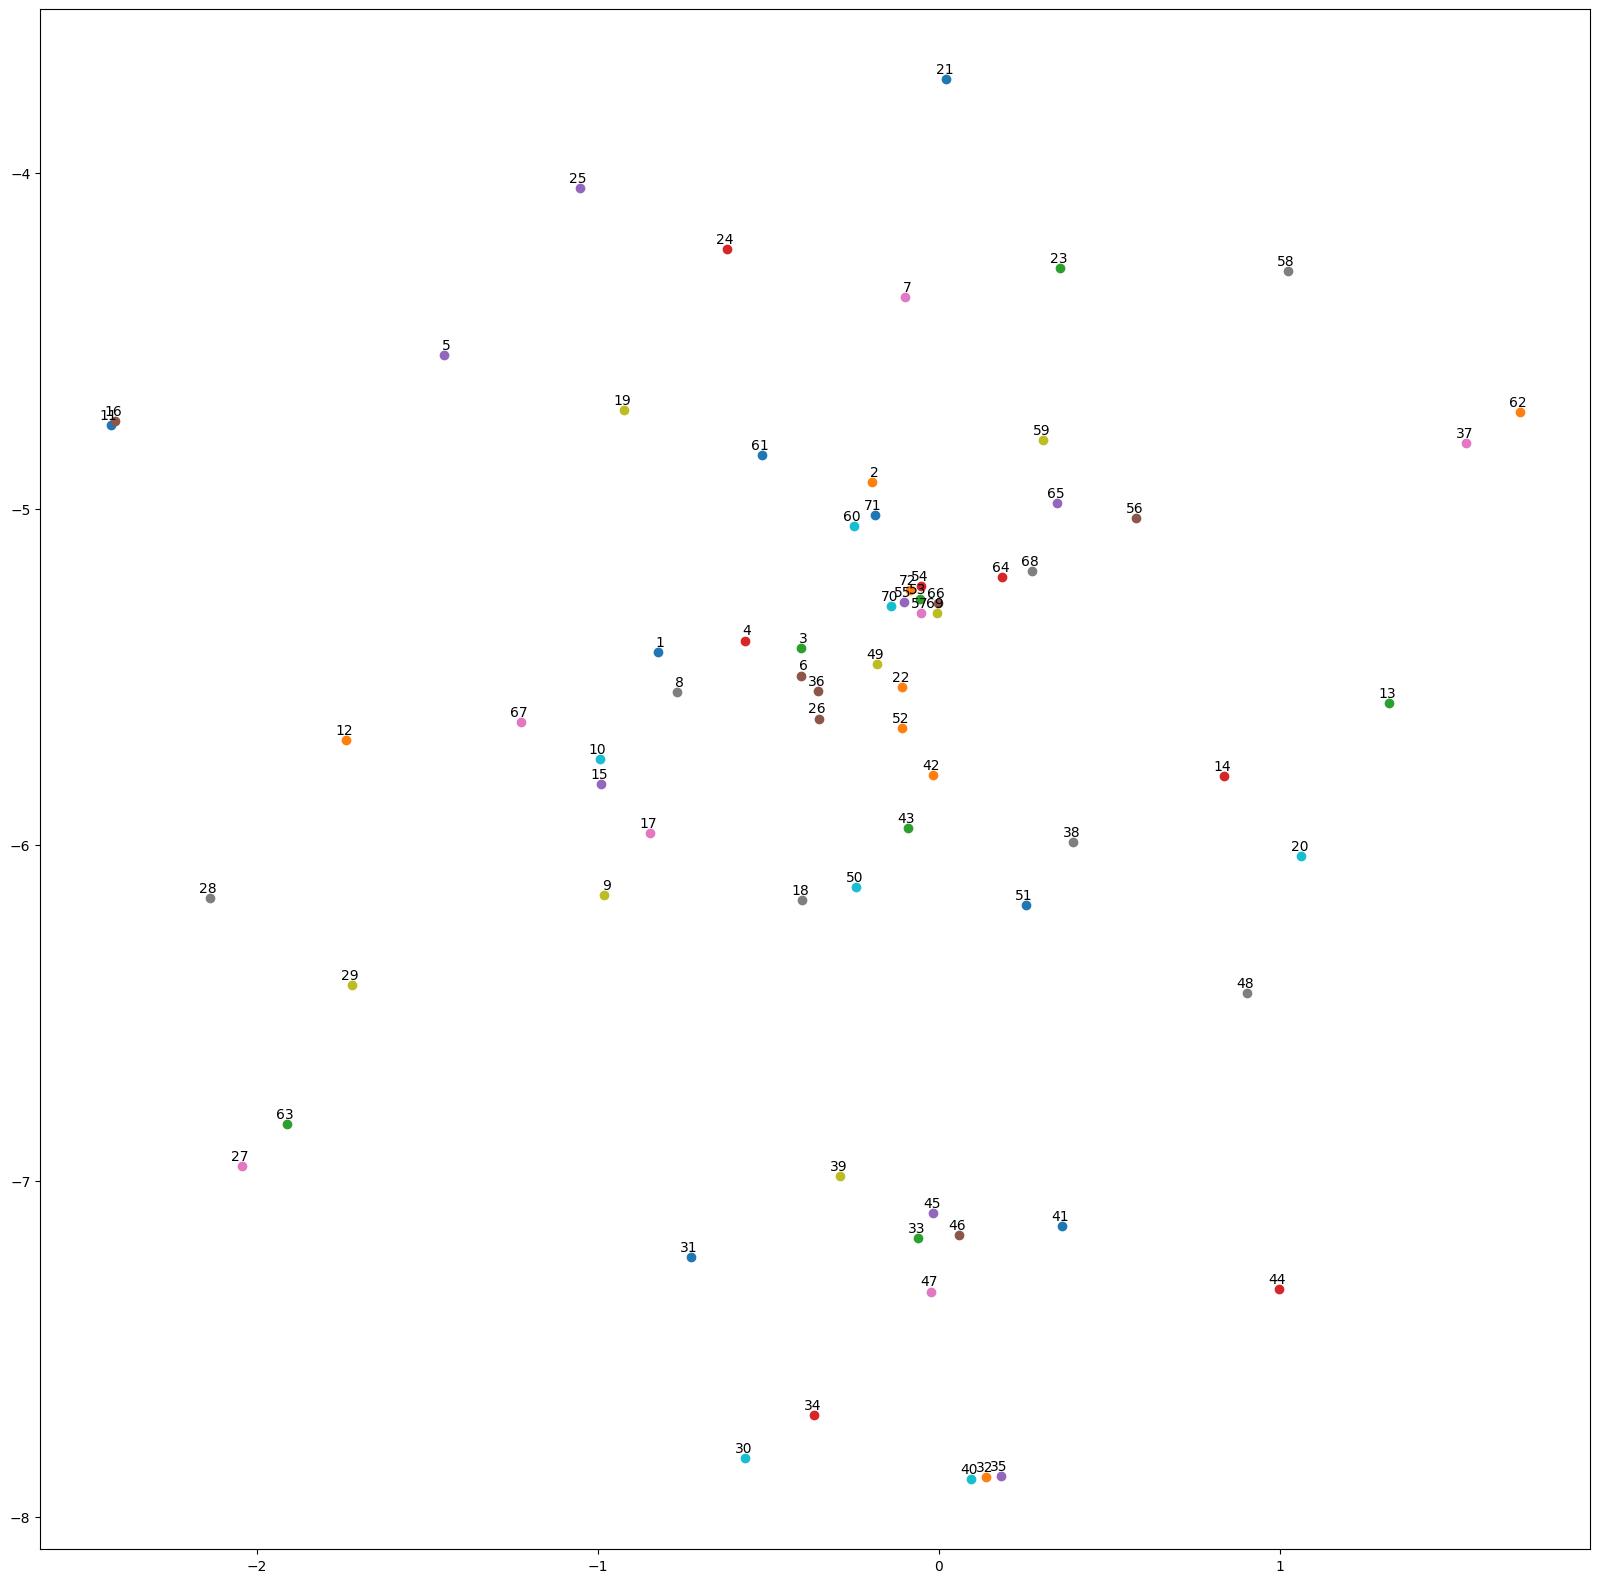

In [204]:
plot_documents(df)

In [223]:
print(df["Cleaned Docs"][39])
print(df["Cleaned Docs"][31])
print(df["Cleaned Docs"][34])

print(df["Cleaned Docs"][33])
print(df["Cleaned Docs"][43])
print("finally!!!!!!!")

print(df["Cleaned Docs"][69])
print(df["Cleaned Docs"][54])
print(df["Cleaned Docs"][71])

print(df["Cleaned Docs"][10])
print(df["Cleaned Docs"][15])

still sin sinner doesnt know sin
human error sin everything improper sin
sin commit mistake incidental
maybe sin mistake evil intent
choose hell
finally!!!!!!!
actually human well aware life really difficult know difficulty limitation precisely know life difficult science base moral human moral standard everything present standard data refer justice every thing consequence consequence make well bad prolife prochoice god live
im pro life belief fetus conceive already life already consciousness abort life collector thing doesnt know anything get ta follow anywhere maybe next time couple plan child would even difficult birth defect etc contraception isnt good either like pill sexual education important sometimes lifestyle cant lie
rape victim let confuse let divide section context marriage ideal build family health reason person case yearold rap well abortion government right set regulation point view victim return victim dont want government accommodate everything consequence agree educa

Clustering

In [24]:
from sklearn.cluster import KMeans, DBSCAN

def dbscan_draw(vectors):
    dbscan = DBSCAN(eps=1, min_samples=2)
    clusters = dbscan.fit_predict(vectors)
    print(clusters)


In [25]:
dbscan_draw(list(df["Sentence Embedding"]))

KeyError: 'Sentence Embedding'

And God help us cluster it.

Word2Vec

In [24]:
import gensim
import gensim.downloader as api
from nltk.test.gensim_fixt import setup_module
setup_module()

model = api.load('word2vec-google-news-300')

Sentence embedding formula

In [38]:
# embed each word in a sentence, returns a list of word vectors (len(word) x 300 )
def sentence_embed(sentence, w2v, tfidf_matrix, aggregate="avg"):
    word_vectors = [w2v[word] for word in sentence if word in w2v]
    if aggregate == "wavg":
        pass
    if aggregate == "wsum":
        pass
    return word_vectors


# def sentence_embed(sentence, w2v, aggregate="avg"):
#     # get word vectors
#     word_vectors = [w2v[word] for word in sentence if word in w2v]
#     sentence_vectors = []
#     if aggregate == "avg":
#         sentence_vectors = sentence_average(word_vectors)
#     elif aggregate == "wavg":
#         sentence_vectors = weighted_average(word_vectors)
#     elif aggregate == "wsum":
#         sentence_vectors = weighted_sum(word_vectors)
#     else:
#         print("that's why yo granny ain't got no knees")
    
#     return sentence_vectors
    
# normal average
def sentence_average(wvs):
    return np.mean(wvs, axis=0)
    
# weighted average
def weighted_average(wvs, tfidf_matrix):
    weighted_vectors = np.multiply(wvs, weights.reshape(-1, 1))
    return np.mean(weighted_vectors, axis=0)

# weighted sum
def weighted_sum(wvs, tfidf_matrix):
    weighted_vectors = np.multiply(wvs, weights.reshape(-1,1))
    return np.sum(weighted_vectors, axis=0)

def aggregate_sentences(sentence_vectors):
    return np.mean(sentence_vectors, axis=0)


In [1]:
tokens = nltk.word_tokenize(" would die birth prolife")
print(tokens)

thing = [vectorizer.transform([token]) for token in tokens]




NameError: name 'nltk' is not defined